In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/ankitbhardwaj/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
covid_dataset = pd.read_csv('covid_data.csv')

In [4]:
covid_dataset.head(5)

,Patient Number,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Current Status,Notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes
0,1,KL-TS-P1,30/01/2020,NaN,20,F,Thrissur,Thrissur,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan
1,2,KL-AL-P1,02/02/2020,NaN,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan
2,3,KL-KS-P1,03/02/2020,NaN,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,Recovered,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan
3,4,DL-P1,02/03/2020,NaN,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,Recovered,"Travelled from Austria, Italy",NaN,India,Imported,15/03/2020,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria
4,5,TS-P1,02/03/2020,NaN,24,M,Hyderabad,Hyderabad,Telangana,TG,Recovered,"Travelled from Dubai to Bangalore on 20th Feb,...",NaN,India,Imported,02/03/2020,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,"Travel history to Dubai, Singapore contact"


In [5]:
covid_dataset.columns

Index(['Patient Number', 'State Patient Number', 'Date Announced',
       'Estimated Onset Date', 'Age Bracket', 'Gender', 'Detected City',
       'Detected District', 'Detected State', 'State code', 'Current Status',
       'Notes', 'Contracted from which Patient (Suspected)', 'Nationality',
       'Type of transmission', 'Status Change Date', 'Source_1', 'Source_2',
       'Source_3', 'Backup Notes'],
      dtype='object')

In [6]:
covid_dataset.drop(['Patient Number', 'State Patient Number', 'Estimated Onset Date', 'Notes', 'Nationality','Status Change Date', 'Source_1', 'Source_2',
       'Source_3', 'Backup Notes'], 'columns', inplace = True )

In [8]:
covid_dataset.sample(10)

,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Current Status,Contracted from which Patient (Suspected),Type of transmission
13616,17/04/2020,NaN,NaN,NaN,Kurnool,Andhra Pradesh,AP,Hospitalized,NaN,NaN
9439,13/04/2020,NaN,NaN,NaN,Jalandhar,Punjab,PB,Hospitalized,NaN,NaN
11458,14/04/2020,NaN,NaN,NaN,Mumbai,Maharashtra,MH,Hospitalized,NaN,NaN
18711,21/04/2020,NaN,M,NaN,Surat,Gujarat,GJ,Hospitalized,NaN,NaN
12463,16/04/2020,NaN,M,NaN,Ahmadabad,Gujarat,GJ,Hospitalized,NaN,NaN
15432,18/04/2020,NaN,NaN,NaN,Hyderabad,Telangana,TG,Hospitalized,NaN,NaN
16477,19/04/2020,NaN,NaN,NaN,NaN,Maharashtra,MH,Hospitalized,NaN,NaN
3491,04/04/2020,NaN,NaN,NaN,Ahmadabad,Gujarat,GJ,Hospitalized,NaN,Local
8893,12/04/2020,13,M,NaN,Vijayapura,Karnataka,KA,Hospitalized,NaN,TBD
20555,22/04/2020,NaN,NaN,NaN,Mumbai,Maharashtra,MH,Hospitalized,NaN,NaN


In [20]:
state_vs_status = pd.crosstab(covid_dataset['State code'], covid_dataset['Current Status'])

state_vs_status

Current Status,Deceased,Hospitalized,Migrated,Recovered
State code,,,,
AN,0,22,0,11
AP,0,1095,0,2
AR,0,1,0,0
AS,0,36,0,0
BR,1,276,0,0
CH,0,36,0,0
CT,0,29,0,8
DL,1,2914,1,2
GA,0,7,0,0


In [21]:
state_vs_status.columns

Index(['Deceased', 'Hospitalized', 'Migrated', 'Recovered'], dtype='object', name='Current Status')

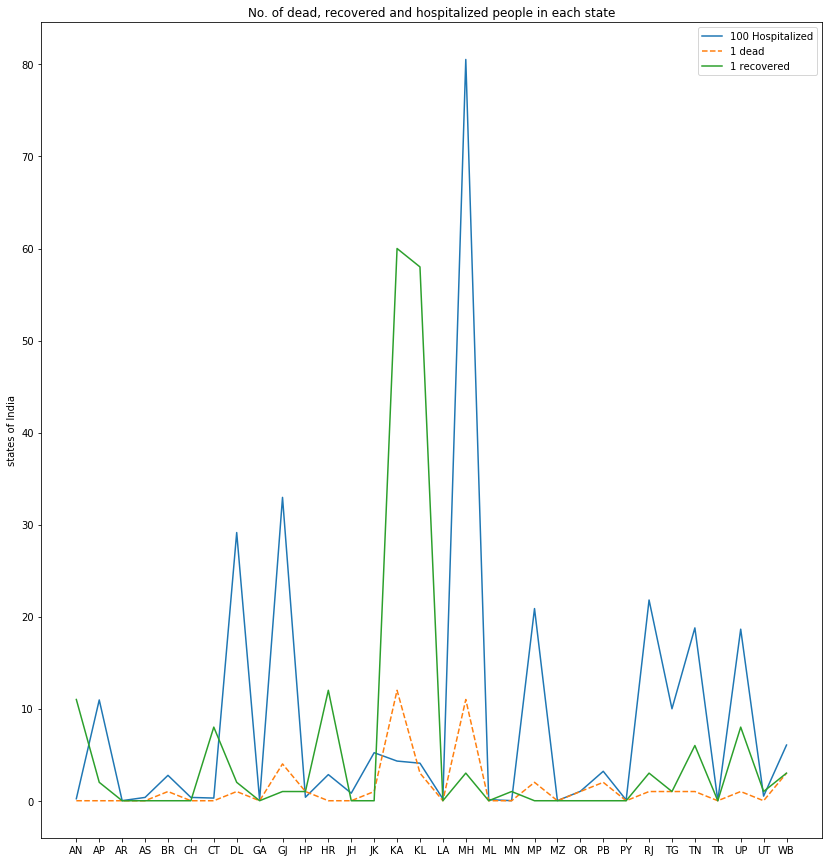

In [31]:
fig, ax = plt.subplots(figsize=(14,15))
plt.title("No. of dead, recovered and hospitalized people in each state")
plt.plot(state_vs_status['Hospitalized'] * 0.01, label ="100 Hospitalized")
plt.plot(state_vs_status['Deceased'], label ="1 dead", linestyle='dashed')
plt.plot(state_vs_status['Recovered'], label ="1 recovered", )
plt.legend()
plt.ylabel("states of India")
plt.show()
